<a href="https://colab.research.google.com/github/Wertymuna/model_warna_6_dengan_python/blob/main/model_warna_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WhatsApp Image 2025-03-12 at 14.14.55.jpeg to WhatsApp Image 2025-03-12 at 14.14.55 (4).jpeg


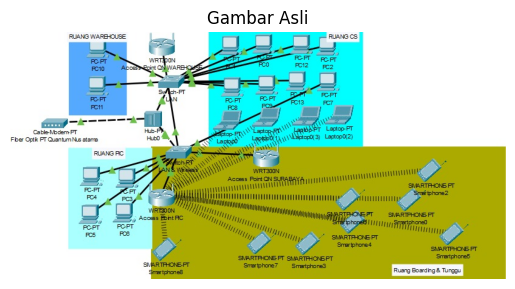

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Program 1: Unggah dan tampilkan gambar
uploaded = files.upload()

for filename in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[filename]))
    image = np.array(image)

    # Tampilkan gambar asli
    plt.imshow(image)
    plt.title("Gambar Asli")
    plt.axis("off")
    plt.show()



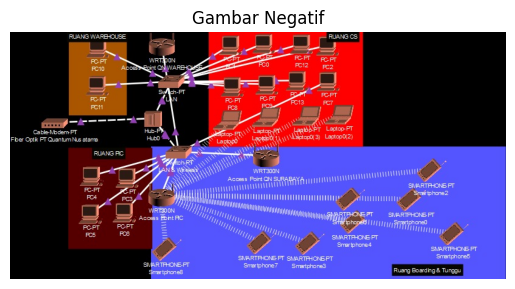

In [3]:
# Program 2: Konversi ke citra negatif
def convert_to_negative(image):
    return 255 - image

# Jalankan konversi dan tampilkan hasilnya
negative_image = convert_to_negative(image)

plt.imshow(negative_image)
plt.title("Gambar Negatif")
plt.axis("off")
plt.show()

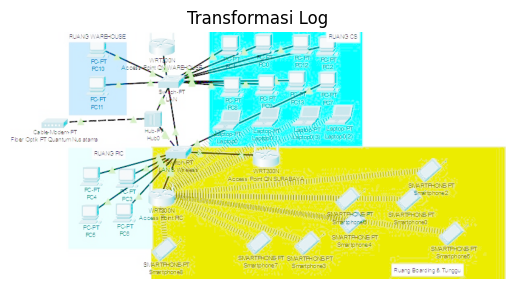

In [4]:
# Program 3: Transformasi Log
def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image.astype(np.float32))
    return np.uint8(log_image)

# Jalankan transformasi log dan tampilkan hasilnya
log_image = log_transform(image)

plt.imshow(log_image, cmap='gray')
plt.title("Transformasi Log")
plt.axis("off")
plt.show()

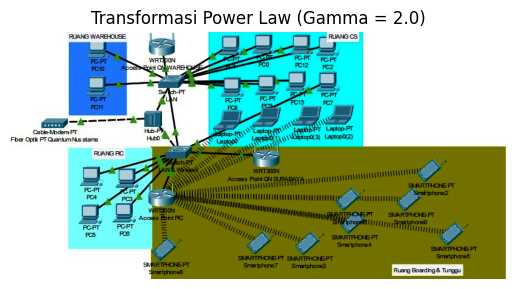

In [5]:
# Program 4: Transformasi Power Law (Gamma Correction)
def power_law_transform(image, gamma=1.0):
    c = 255 / (np.max(image) ** gamma)
    power_image = c * (image.astype(np.float32) ** gamma)
    return np.uint8(power_image)

# Jalankan transformasi power law dan tampilkan hasilnya
gamma = 2.0  # Anda bisa mengganti nilai gamma sesuai kebutuhan
power_image = power_law_transform(image, gamma)

plt.imshow(power_image, cmap='gray')
plt.title(f"Transformasi Power Law (Gamma = {gamma})")
plt.axis("off")
plt.show()

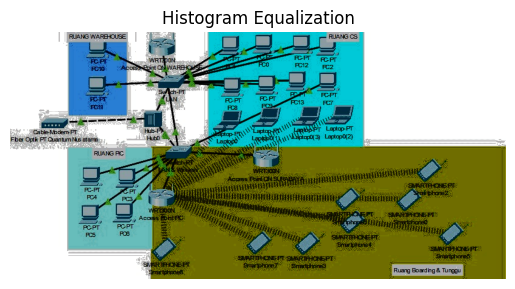

In [6]:
# Program 5: Histogram Equalization
def histogram_equalization(image):
    if len(image.shape) == 3:  # Jika gambar berwarna (RGB)
        image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
        equalized_image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
    else:  # Jika gambar grayscale
        equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Jalankan histogram equalization dan tampilkan hasilnya
equalized_image = histogram_equalization(image)

plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")
plt.show()

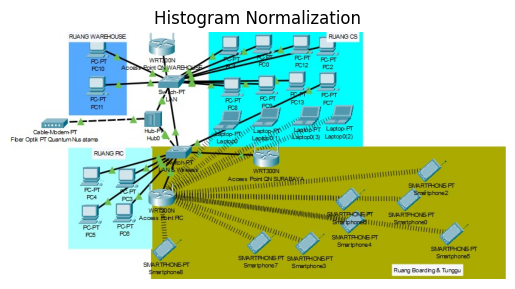

In [7]:
# Program 6: Histogram Normalization
def histogram_normalization(image):
    image = image.astype(np.float32)
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return np.uint8(norm_image)

# Jalankan histogram normalization dan tampilkan hasilnya
normalized_image = histogram_normalization(image)

plt.imshow(normalized_image, cmap='gray')
plt.title("Histogram Normalization")
plt.axis("off")
plt.show()

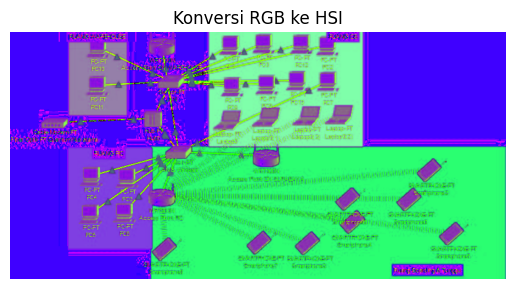

In [8]:
# Program 7: Konversi RGB ke HSI
def rgb_to_hsi(image):
    image = image.astype(np.float32) / 255.0
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-10
    theta = np.arccos(num / den)
    H = np.where(B > G, 2 * np.pi - theta, theta)
    H = H / (2 * np.pi) * 255
    S = 1 - 3 * np.minimum(R, np.minimum(G, B)) / (R + G + B + 1e-10)
    I = (R + G + B) / 3
    HSI = np.stack([H, S * 255, I * 255], axis=-1)
    return np.uint8(HSI)

# Jalankan konversi RGB ke HSI dan tampilkan hasilnya
hsi_image = rgb_to_hsi(image)

plt.imshow(hsi_image)
plt.title("Konversi RGB ke HSI")
plt.axis("off")
plt.show()